In [25]:
import torchvision.transforms as T
def tensor_to_img(data, mode=None):
    return T.ToPILImage(mode=mode)(data)
    

In [1]:
from omegaconf import OmegaConf
from repromvtrans.runner import Runner
import torchvision.transforms as T
import torch

import PIL

import numpy as np
from repromvtrans.dataloaders.nerf_synthetic_loader import NerfSyntheticDataset

cfg = cfg = OmegaConf.load("../config/config.yaml")
cfg.datasets.nerf_synthetic.root = "../data/nerf_synthetic/lego"

runner = Runner.load_from_checkpoint("../mvtrans/ww873z82/checkpoints/epoch=0-step=140.ckpt", cfg=cfg)
model = runner.model

def tensor_to_img(data, mode=None):
    data *= 255
    return T.ToPILImage(mode=mode)(data)
    

data = NerfSyntheticDataset(cfg)

(imgs, cams), y = data[20]
y = y.int() * 255*255

batched_img = imgs.unsqueeze(0)
batched_cams = cams.unsqueeze(0)

print(cams.shape)
print(imgs.shape)

(depth, seg) = model(batched_img, batched_cams, runner.cam_intr)
out = seg.seg_pred

print(out.max())

target = tensor_to_img(y, mode="L").resize((800, 800))
img = tensor_to_img(out[0], mode="L").resize((800,800))
display(img)
display(target)





/Users/pietertolsma/Thesis/ReproMVTrans/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/pietertolsma/Thesis/ReproMVTrans/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([3, 4, 4])
torch.Size([3, 3, 800, 800])


/Users/pietertolsma/Thesis/ReproMVTrans/.venv/lib/python3.9/site-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/Users/pietertolsma/Thesis/ReproMVTrans/.venv/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Users/pietertolsma/Thesis/ReproMVTrans/.venv/lib/python3.9/site-packages/torch/nn/functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.


AttributeError: 'tuple' object has no attribute 'depth_pred'

tensor(65025, dtype=torch.int32)


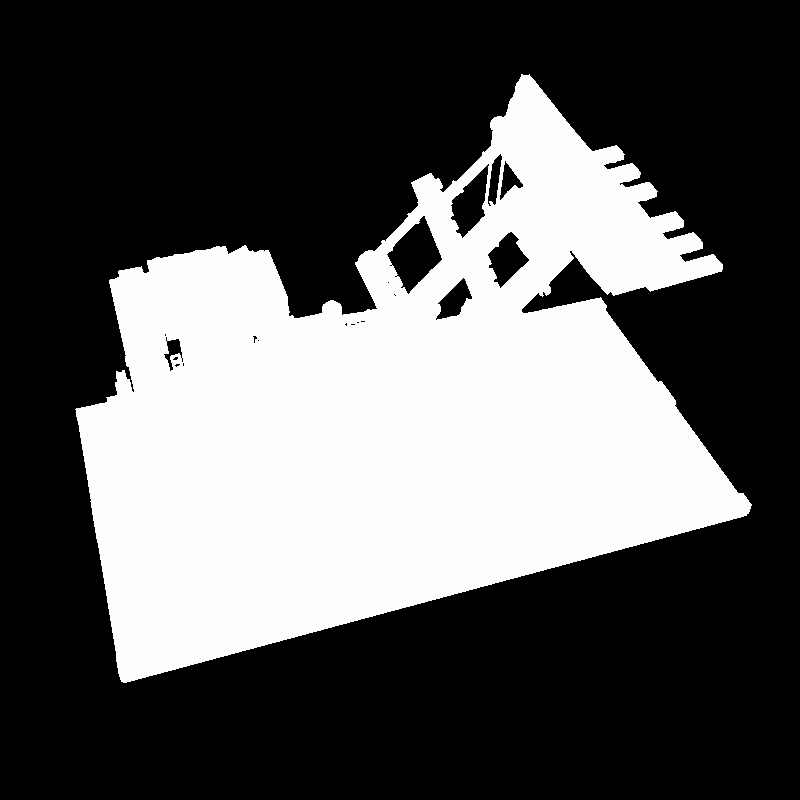

In [29]:
from omegaconf import OmegaConf
from repromvtrans.runner import Runner
import torchvision.transforms as T
import torch

import PIL

import numpy as np
from repromvtrans.dataloaders.nerf_synthetic_loader import NerfSyntheticDataset

cfg = cfg = OmegaConf.load("../config/config.yaml")
cfg.datasets.nerf_synthetic.root = "../data/nerf_synthetic/lego"

data = NerfSyntheticDataset(cfg)

(imgs, cams), y = data[20]

y = y.int() * 255*255
print(y.max())

target = tensor_to_img(y)

display(target)